In [1]:
%matplotlib widget

#import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from scipy import linalg
from sklearn.model_selection import train_test_split


In [2]:
n = 500
A = np.array([np.random.normal(0,2,n), np.random.normal(0,2.5,n)])
A = A.T
B = np.array([np.random.normal(7.5,4,n), np.random.normal(2,1.7,n)])
B = B.T

In [3]:
A.shape, B.shape

((500, 2), (500, 2))

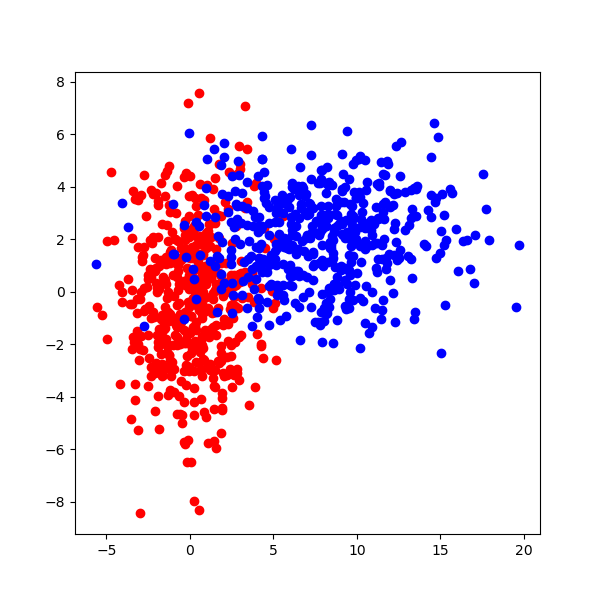

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(A[...,0],A[...,1],color='red')
plt.scatter(B[...,0],B[...,1],color='blue')

In [5]:
x_data = np.concatenate((A,B),axis=0)

In [6]:
x_data.shape

(1000, 2)

In [7]:
y_data = np.concatenate((np.ones(n),np.zeros(n)),axis=0)

In [8]:
(x_train, x_test, y_train, y_test) = train_test_split(x_data, y_data, 
                                                      test_size=0.2, random_state=42)

In [9]:
#xg_reg = xgb.XGBClassifier(tree_method="gpu_hist", enable_categorical=True, n_estimators=30, max_depth=10)
xg_reg = xgb.XGBClassifier(enable_categorical=True, n_estimators=30, max_depth=10)

In [10]:
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %2f" % (rmse))
print('Accuracy:', round(accuracy_score(y_test, y_pred), 3))


ValueError: Experimental support for categorical data is not implemented for current tree method yet.

In [ ]:
bidx = np.where(y_pred!=y_test)[0]
bpts = x_test[bidx]

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(A[...,0],A[...,1],color='red', alpha=0.5)
plt.scatter(B[...,0],B[...,1],color='blue', alpha=0.5)
plt.scatter(bpts[...,0],bpts[...,1], color='yellow',marker='x')